In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import  train_test_split
from keras.utils.np_utils import to_categorical
from keras import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

Saving heart.csv to heart (2).csv


In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


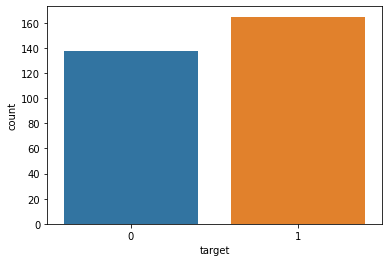

In [ ]:
sns.countplot(df['target'])

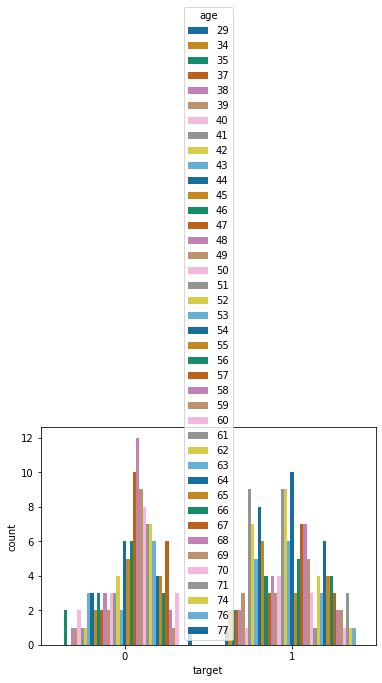

In [ ]:
sns.countplot(x='target', hue='age', data=df, palette='colorblind')

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


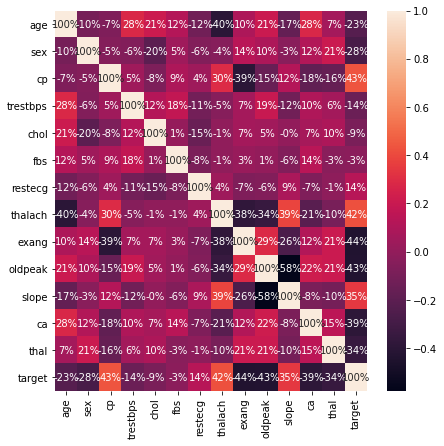

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [ ]:
cols_to_normalized = ['age', 'trestbps','chol', 'thalach', 'thal']
jantung_normalized = df[cols_to_normalized].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

jantung_normalized['sex'] = df['sex']
jantung_normalized['cp'] = df['cp']
jantung_normalized['fbs'] = df['fbs']
jantung_normalized['restecg'] = df['restecg']
jantung_normalized['exang'] = df['exang']
jantung_normalized['oldpeak'] = df['oldpeak']
jantung_normalized['slope'] = df['slope']
jantung_normalized['ca'] = df['ca']
jantung_normalized['target'] = df['target']
jantung_normalized

,age,trestbps,chol,thalach,thal,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,target
0,0.708333,0.481132,0.244292,0.603053,0.333333,1,3,1,0,0,2.3,0,0,1
1,0.166667,0.339623,0.283105,0.885496,0.666667,1,2,0,1,0,3.5,0,0,1
2,0.250000,0.339623,0.178082,0.770992,0.666667,0,1,0,0,0,1.4,2,0,1
3,0.562500,0.245283,0.251142,0.816794,0.666667,1,1,0,1,0,0.8,2,0,1
4,0.583333,0.245283,0.520548,0.702290,0.666667,0,0,0,1,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,1.000000,0,0,0,1,1,0.2,1,0,0
299,0.333333,0.150943,0.315068,0.465649,1.000000,1,3,0,1,0,1.2,1,0,0
300,0.812500,0.471698,0.152968,0.534351,1.000000,1,0,1,1,0,3.4,1,2,0
301,0.583333,0.339623,0.011416,0.335878,1.000000,1,0,0,1,1,1.2,1,1,0


In [ ]:
#Splitting data into feature and label
X = jantung_normalized.drop("target", axis=1)
y = jantung_normalized["target"]

In [ ]:
X

,age,trestbps,chol,thalach,thal,sex,cp,fbs,restecg,exang,oldpeak,slope,ca
0,0.708333,0.481132,0.244292,0.603053,0.333333,1,3,1,0,0,2.3,0,0
1,0.166667,0.339623,0.283105,0.885496,0.666667,1,2,0,1,0,3.5,0,0
2,0.250000,0.339623,0.178082,0.770992,0.666667,0,1,0,0,0,1.4,2,0
3,0.562500,0.245283,0.251142,0.816794,0.666667,1,1,0,1,0,0.8,2,0
4,0.583333,0.245283,0.520548,0.702290,0.666667,0,0,0,1,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,1.000000,0,0,0,1,1,0.2,1,0
299,0.333333,0.150943,0.315068,0.465649,1.000000,1,3,0,1,0,1.2,1,0
300,0.812500,0.471698,0.152968,0.534351,1.000000,1,0,1,1,0,3.4,1,2
301,0.583333,0.339623,0.011416,0.335878,1.000000,1,0,0,1,1,1.2,1,1


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# mean = X.mean(axis=0)
# X -= mean
# std = X.std(axis=0)
# X /= std

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (227, 13) (76, 13)


In [ ]:
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
# print(Y_test.shape)
# print(Y_test[:10])


In [ ]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

In [ ]:
# set data size
input_dimensi = 13
kernel = 'normal'

In [ ]:
# Construct model
model = Sequential()
model.add(Dense(2048,activation = 'relu',input_shape=(13,))) 
model.add(Dropout(0.7))
model.add(Flatten())
model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.7))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.7))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
# Display model architecture summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              28672     
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.88):
      print("\nAkurasi telah mencapai >88%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=10, callbacks=[callbacks], verbose=True)

Epoch 1/100
23/23 [==============================] - 2s 60ms/step - loss: 0.6969 - accuracy: 0.5437 - val_loss: 0.6903 - val_accuracy: 0.5395
Epoch 2/100
23/23 [==============================] - 1s 34ms/step - loss: 0.6989 - accuracy: 0.5149 - val_loss: 0.6936 - val_accuracy: 0.5395
Epoch 3/100
23/23 [==============================] - 1s 32ms/step - loss: 0.6827 - accuracy: 0.5531 - val_loss: 0.6815 - val_accuracy: 0.5395
Epoch 4/100
23/23 [==============================] - 1s 34ms/step - loss: 0.7015 - accuracy: 0.5194 - val_loss: 0.6575 - val_accuracy: 0.5395
Epoch 5/100
23/23 [==============================] - 1s 32ms/step - loss: 0.6793 - accuracy: 0.5424 - val_loss: 0.6602 - val_accuracy: 0.7237
Epoch 6/100
23/23 [==============================] - 1s 34ms/step - loss: 0.6580 - accuracy: 0.5742 - val_loss: 0.5910 - val_accuracy: 0.6842
Epoch 7/100
23/23 [==============================] - 1s 33ms/step - loss: 0.6399 - accuracy: 0.5776 - val_loss: 0.6320 - val_accuracy: 0.8947
Epoch 

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy: ", score[1])
print("Testing Loss: ", score[0])

Testing Accuracy:  0.8815789222717285
Testing Loss:  0.42851167917251587


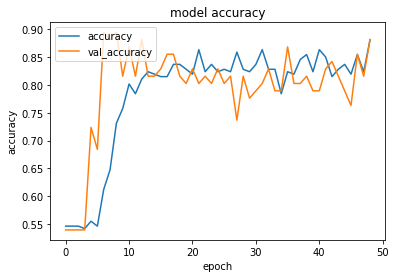

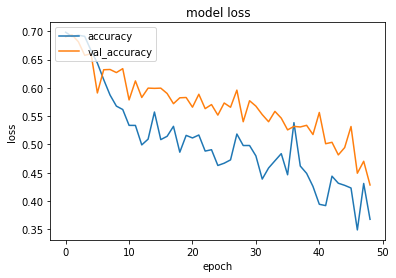

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: ", score[1])
print("Training Loss: ", score[0])

score = model.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy: ", score[1])
print("Testing Loss: ", score[0])

Training Accuracy:  0.907489001750946
Training Loss:  0.3025151193141937
Testing Accuracy:  0.8815789222717285
Testing Loss:  0.42851167917251587


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
preds = model.predict(X_test) # label scores 

classpreds = np.argmax(preds, axis=1) # predicted classes 

print("Result for Categorical Model: ")
print(accuracy_score(y_test, classpreds))
print(classification_report(y_test, classpreds))

Result for Categorical Model: 
0.881578947368421
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [ ]:
# c_names = ['Heart Disease', 'Not Heart Disease']

In [ ]:
# print('Classification Report')
# print(classification_report(y_testclass, classpreds, target_names=c_names))


# print('Confusion Matrix')
# print(confusion_matrix(y_testclass, classpreds))

In [ ]:
model.save('model_akurasi overfitting kecil.h5')

In [ ]:
konverter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = konverter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpyojl4gil/assets


INFO:tensorflow:Assets written to: /tmp/tmpyojl4gil/assets


In [ ]:
with tf.io.gfile.GFile('model_akurasi_overfitting_kecil.tflite', 'wb') as f:
  f.write(tflite_model)